In [129]:
import pandas as pd

In [7]:
df = pd.read_parquet('..//gcp/reviews_starbucks.parquet')
df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,ULzbgT5SPThiMOoo4a_Adw,veBX5roHQLNnQ1rTtNh_gg,aJvxWyQIG5OLfBw3qAe8xA,2.0,0,0,0,"Ordered Caramel frappe at Drive thru, BIG MIST...",2017-12-29
1,RXqhxbAuPPSNs-oyJJyOgw,zZygOZLNyJX5nDqKrwa4HQ,MjZQqZAmJeMco_Vq-Y9h-g,4.0,0,0,0,Drum-roll please! Review #100 coming right up!...,2014-02-05
2,LuMkMBAUV1B-2dm2pqSBWw,0SpK7eVn5TrpyQKPaohVBw,u7MJKcNdZXYyTeb67vD5jw,4.0,1,0,0,We stopped here for my Chai and Hubby's coffee...,2017-02-09
3,Z0Jt8xf0XqFD_xjPPm_d0g,IVnrNZ8npRx04jkNp6-ERA,saJFbz12EnzanelpD8_xXQ,2.0,0,0,0,There's been three times that I've ordered a g...,2016-08-25
4,NoPOfj7gC1l48dC0XH7Spw,tgP2gKsf3O9MyuLuolv2oQ,KiE0h68HGOO7ZXAqkMBdiw,1.0,0,1,0,"I went in when they had 4 people working, wait...",2016-01-30


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16919 entries, 0 to 16918
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   review_id    16919 non-null  object        
 1   user_id      16919 non-null  object        
 2   business_id  16919 non-null  object        
 3   stars        16919 non-null  float64       
 4   useful       16919 non-null  int64         
 5   funny        16919 non-null  int64         
 6   cool         16919 non-null  int64         
 7   text         16919 non-null  object        
 8   date         16919 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 1.2+ MB


In [9]:
df.describe()

,stars,useful,funny,cool,date
count,16919.000000,16919.000000,16919.000000,16919.000000,16919
mean,3.071813,0.903954,0.370057,0.523317,2017-02-09 09:37:08.429576448
min,1.000000,0.000000,0.000000,0.000000,2005-07-10 00:00:00
25%,1.000000,0.000000,0.000000,0.000000,2015-03-20 00:00:00
50%,3.000000,0.000000,0.000000,0.000000,2017-05-08 00:00:00
75%,5.000000,1.000000,0.000000,0.000000,2019-05-10 00:00:00
max,5.000000,112.000000,39.000000,102.000000,2022-01-19 00:00:00
std,1.569935,2.846581,1.528545,2.406872,NaN


# Analisis Sentimental Avanzado

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
import joblib

In [4]:
# Cargar el archivo de datos
file_path = '../gcp/reviews_starbucks.parquet'
df = pd.read_parquet(file_path)

# Ver las primeras filas del DataFrame
print(df.head())

                review_id                 user_id             business_id  \
0  ULzbgT5SPThiMOoo4a_Adw  veBX5roHQLNnQ1rTtNh_gg  aJvxWyQIG5OLfBw3qAe8xA   
1  RXqhxbAuPPSNs-oyJJyOgw  zZygOZLNyJX5nDqKrwa4HQ  MjZQqZAmJeMco_Vq-Y9h-g   
2  LuMkMBAUV1B-2dm2pqSBWw  0SpK7eVn5TrpyQKPaohVBw  u7MJKcNdZXYyTeb67vD5jw   
3  Z0Jt8xf0XqFD_xjPPm_d0g  IVnrNZ8npRx04jkNp6-ERA  saJFbz12EnzanelpD8_xXQ   
4  NoPOfj7gC1l48dC0XH7Spw  tgP2gKsf3O9MyuLuolv2oQ  KiE0h68HGOO7ZXAqkMBdiw   

   stars  useful  funny  cool  \
0    2.0       0      0     0   
1    4.0       0      0     0   
2    4.0       1      0     0   
3    2.0       0      0     0   
4    1.0       0      1     0   

                                                text       date  
0  Ordered Caramel frappe at Drive thru, BIG MIST... 2017-12-29  
1  Drum-roll please! Review #100 coming right up!... 2014-02-05  
2  We stopped here for my Chai and Hubby's coffee... 2017-02-09  
3  There's been three times that I've ordered a g... 2016-08-25  
4  I wen

In [5]:
# Mapear las estrellas a sentimientos: 1-2 estrellas como negativo, 3 estrellas como neutral, 4-5 estrellas como positivo
def map_sentiment(stars):
    if stars <= 2:
        return 0  # negativo
    elif stars == 3:
        return 1  # neutral
    else:
        return 2  # positivo

df['sentiment'] = df['stars'].apply(map_sentiment)

# Seleccionar las columnas necesarias
data = df[['text', 'sentiment']].dropna()

In [6]:
X = data['text']
y = data['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
pipeline = make_pipeline(TfidfVectorizer(), LogisticRegression(max_iter=1000))
pipeline.fit(X_train, y_train)

# Evaluar el modelo
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85      1310
           1       0.44      0.15      0.23       464
           2       0.83      0.90      0.86      1610

    accuracy                           0.80      3384
   macro avg       0.69      0.65      0.65      3384
weighted avg       0.76      0.80      0.77      3384



El modelo tiene un rendimiento sólido para las clases negativas (0) y positivas (2) con altas precisiones y recalls.
El rendimiento del modelo para la clase neutral (1) es considerablemente más bajo, con una precisión y recall bajos, lo que sugiere que el modelo tiene dificultades para distinguir instancias neutrales.
La exactitud general es del 80%, lo que indica un buen rendimiento global.
Las métricas macro promedio y ponderadas indican un rendimiento razonable en general, pero el rendimiento varía significativamente entre las clases.

In [8]:
# Guardar el modelo en el directorio ../models
model_path = '../models/sentiment_analysis.pkl'
joblib.dump(pipeline, model_path)

['../models/sentiment_analysis.pkl']

In [11]:
# Definir un diccionario que mapea los valores de sentimiento a emojis
sentiment_to_emoji = {
    0: "😞",  # negativo
    1: "😐",  # neutral
    2: "😊"   # positivo
}

# Función para predecir y devolver el emoji correspondiente
def predict_sentiment(text):
    prediction = loaded_model.predict([text])[0]
    return sentiment_to_emoji[prediction]

# Cargar el modelo guardado
loaded_model = joblib.load(model_path)

# Ejemplo de uso con una nueva reseña
new_review = "Terrible service, they served me very late, the wifi is working slow"
predicted_emoji = predict_sentiment(new_review)
print("Predicted sentiment emoji:", predicted_emoji)

Predicted sentiment emoji: 😞


# Detección de reviews falsos o manipulados

In [44]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
import joblib

In [21]:
# Cargar el archivo reviews_starbucks.parquet
file_path = '../gcp/reviews_starbucks.parquet'
df_reviews = pd.read_parquet(file_path)

# Mostrar una vista previa de los datos
df_reviews.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,ULzbgT5SPThiMOoo4a_Adw,veBX5roHQLNnQ1rTtNh_gg,aJvxWyQIG5OLfBw3qAe8xA,2.0,0,0,0,"Ordered Caramel frappe at Drive thru, BIG MIST...",2017-12-29
1,RXqhxbAuPPSNs-oyJJyOgw,zZygOZLNyJX5nDqKrwa4HQ,MjZQqZAmJeMco_Vq-Y9h-g,4.0,0,0,0,Drum-roll please! Review #100 coming right up!...,2014-02-05
2,LuMkMBAUV1B-2dm2pqSBWw,0SpK7eVn5TrpyQKPaohVBw,u7MJKcNdZXYyTeb67vD5jw,4.0,1,0,0,We stopped here for my Chai and Hubby's coffee...,2017-02-09
3,Z0Jt8xf0XqFD_xjPPm_d0g,IVnrNZ8npRx04jkNp6-ERA,saJFbz12EnzanelpD8_xXQ,2.0,0,0,0,There's been three times that I've ordered a g...,2016-08-25
4,NoPOfj7gC1l48dC0XH7Spw,tgP2gKsf3O9MyuLuolv2oQ,KiE0h68HGOO7ZXAqkMBdiw,1.0,0,1,0,"I went in when they had 4 people working, wait...",2016-01-30


In [22]:
# Generar etiquetas aleatorias para la detección de reviews falsos
np.random.seed(42)
df_reviews['label'] = np.random.randint(0, 2, df_reviews.shape[0])

# Separar características y etiquetas, usando solo text y stars
X = df_reviews[['text', 'stars']]
y = df_reviews['label']

In [23]:
# Vectorizar el texto de las reviews
tfidf = TfidfVectorizer(stop_words='english', max_features=100)
X_tfidf = tfidf.fit_transform(X['text'])

# Combinar las características textuales con la columna stars
X_combined = np.hstack((X_tfidf.toarray(), X[['stars']].values.reshape(-1, 1)))

In [24]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

In [25]:
# Entrenar un modelo de Random Forest
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

RandomForestClassifier(random_state=42) es una configuración del modelo que asegura que el proceso de entrenamiento sea reproducible al controlar la aleatoriedad interna del algoritmo.

In [26]:
# Evaluar el modelo
scores = cross_val_score(clf, X_combined, y, cv=5)
print(f'Accuracy: {scores.mean():.2f} ± {scores.std():.2f}')

Accuracy: 0.50 ± 0.01


In [27]:
# Guardar el modelo entrenado
model_path = '../models/manipulated_reviews.pkl'
joblib.dump(clf, model_path)
print(f'Model saved to {model_path}')

Model saved to ../models/manipulated_reviews.pkl


In [28]:
# Nueva review para predecir
new_review = {
    'text': "The coffee was terrible and the service was slow. I will never come back!",
    'stars': 1.0
}

# Transformar la nueva review usando el mismo vectorizador TF-IDF
new_review_tfidf = tfidf.transform([new_review['text']])

# Combinar las características de texto con la columna stars
new_review_combined = np.hstack((new_review_tfidf.toarray(), [[new_review['stars']]]))

# Cargar el modelo guardado
loaded_model = joblib.load(model_path)

# Hacer una predicción
prediction = loaded_model.predict(new_review_combined)

# Mostrar el resultado
print(f'The new review is {"False" if prediction[0] == 1 else "Genuine"}')

The new review is Genuine


# Predicción del rating del negocio basado en los reviews

In [137]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
import numpy as np
import joblib

In [138]:
# Cargar datos desde el archivo Parquet
df_reviews = pd.read_parquet('../gcp/reviews_starbucks.parquet')

# Verificar los primeros registros para asegurarse que se ha cargado correctamente
print(df_reviews.head())

                review_id                 user_id             business_id  \
0  ULzbgT5SPThiMOoo4a_Adw  veBX5roHQLNnQ1rTtNh_gg  aJvxWyQIG5OLfBw3qAe8xA   
1  RXqhxbAuPPSNs-oyJJyOgw  zZygOZLNyJX5nDqKrwa4HQ  MjZQqZAmJeMco_Vq-Y9h-g   
2  LuMkMBAUV1B-2dm2pqSBWw  0SpK7eVn5TrpyQKPaohVBw  u7MJKcNdZXYyTeb67vD5jw   
3  Z0Jt8xf0XqFD_xjPPm_d0g  IVnrNZ8npRx04jkNp6-ERA  saJFbz12EnzanelpD8_xXQ   
4  NoPOfj7gC1l48dC0XH7Spw  tgP2gKsf3O9MyuLuolv2oQ  KiE0h68HGOO7ZXAqkMBdiw   

   stars  useful  funny  cool  \
0    2.0       0      0     0   
1    4.0       0      0     0   
2    4.0       1      0     0   
3    2.0       0      0     0   
4    1.0       0      1     0   

                                                                                                                                                                                                                                                                                                                                                  

In [139]:
# Ejemplo de características y target
X = df_reviews['text']  # Suponiendo que 'text' es la columna con los textos de los reviews
y = df_reviews['stars']  # Suponiendo que 'stars' es el rating del negocio

# Separar en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['stars'], test_size=0.2, random_state=42)

In [140]:
# Crear el pipeline
pipeline = Pipeline([
    ('vect', CountVectorizer()), # Convertir texto a vectores de conteo
    ('clf', RandomForestRegressor(random_state=42))  # Modelo RandomForestRegressor
])

In [141]:
# Entrenar el modelo
pipeline.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()),
                ('clf', RandomForestRegressor(random_state=42))])

In [142]:
# Guardar el modelo entrenado
import joblib
joblib.dump(pipeline, '../models/rating_vectorizer.pkl')

['../models/rating_vectorizer.pkl']

In [144]:
# Nueva review para predecir el rating del negocio
new_review = {
    'text': "The coffee was terrible and the service was slow. I will never come back!",
}

# Cargar el modelo entrenado y el pipeline completo
pipeline_path = '../models/rating_vectorizer.pkl'  # Ajusta al nombre correcto y ubicación de tu pipeline guardado
pipeline = joblib.load(pipeline_path)

# Hacer una predicción del rating del negocio
predicted_rating = pipeline.predict([new_review['text']])

# Mostrar el resultado
print(f'The predicted rating of the business based on the review is: {predicted_rating[0]:.2f}')

# Hacer recomendaciones según el rating predicho
if predicted_rating >= 4.5:
    print("Excellent service! Keep focused on maintaining high quality.")
elif 3.5 <= predicted_rating < 4.5:
    print("Here are some areas for improvement based on the reviews received:")
    # Puedes imprimir recomendaciones específicas basadas en el análisis de las revisiones aquí.
else:
    print("We have identified critical areas that require urgent attention:")
    # Puedes imprimir recomendaciones específicas para abordar los problemas identificados aquí.

The predicted rating of the business based on the review is: 1.10
We have identified critical areas that require urgent attention:


# Analisis Cluster

In [113]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import joblib

In [90]:
# Cargar el DataFrame desde el archivo Parquet
df_reviews = pd.read_parquet('../gcp/reviews_starbucks.parquet')
print(df_reviews.head())

                review_id                 user_id             business_id  \
0  ULzbgT5SPThiMOoo4a_Adw  veBX5roHQLNnQ1rTtNh_gg  aJvxWyQIG5OLfBw3qAe8xA   
1  RXqhxbAuPPSNs-oyJJyOgw  zZygOZLNyJX5nDqKrwa4HQ  MjZQqZAmJeMco_Vq-Y9h-g   
2  LuMkMBAUV1B-2dm2pqSBWw  0SpK7eVn5TrpyQKPaohVBw  u7MJKcNdZXYyTeb67vD5jw   
3  Z0Jt8xf0XqFD_xjPPm_d0g  IVnrNZ8npRx04jkNp6-ERA  saJFbz12EnzanelpD8_xXQ   
4  NoPOfj7gC1l48dC0XH7Spw  tgP2gKsf3O9MyuLuolv2oQ  KiE0h68HGOO7ZXAqkMBdiw   

   stars  useful  funny  cool  \
0    2.0       0      0     0   
1    4.0       0      0     0   
2    4.0       1      0     0   
3    2.0       0      0     0   
4    1.0       0      1     0   

                                                text       date  
0  Ordered Caramel frappe at Drive thru, BIG MIST... 2017-12-29  
1  Drum-roll please! Review #100 coming right up!... 2014-02-05  
2  We stopped here for my Chai and Hubby's coffee... 2017-02-09  
3  There's been three times that I've ordered a g... 2016-08-25  
4  I wen

In [114]:
# Definir el preprocesador de columnas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['stars']),  # Escalar la columna 'stars'
        ('text', TfidfVectorizer(max_features=1000), 'text')  # Vectorizar la columna 'text'
    ])

In [115]:
# Extraer las columnas necesarias 'stars' y 'text' del DataFrame
X = df_reviews[['stars', 'text']]

In [116]:
# Aplicar el preprocesador a X
X_scaled = preprocessor.fit_transform(X)

In [117]:
# Entrenar el modelo de clustering (K-Means)
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled)

KMeans(n_clusters=5, random_state=42)

In [118]:
# Predecir clusters para los datos originales
predicted_clusters = kmeans.predict(X_scaled)

In [119]:
# Añadir los clusters predichos al DataFrame original
df_reviews['predicted_cluster'] = predicted_clusters

In [120]:
# Guardar el modelo entrenado
joblib.dump(kmeans, '../models/cluster_analysis.pkl')

['../models/cluster_analysis.pkl']

Predicciones de cluster para nuevos datos:
   stars                      text  predicted_cluster
0    2.2  Disappointing experience                  4


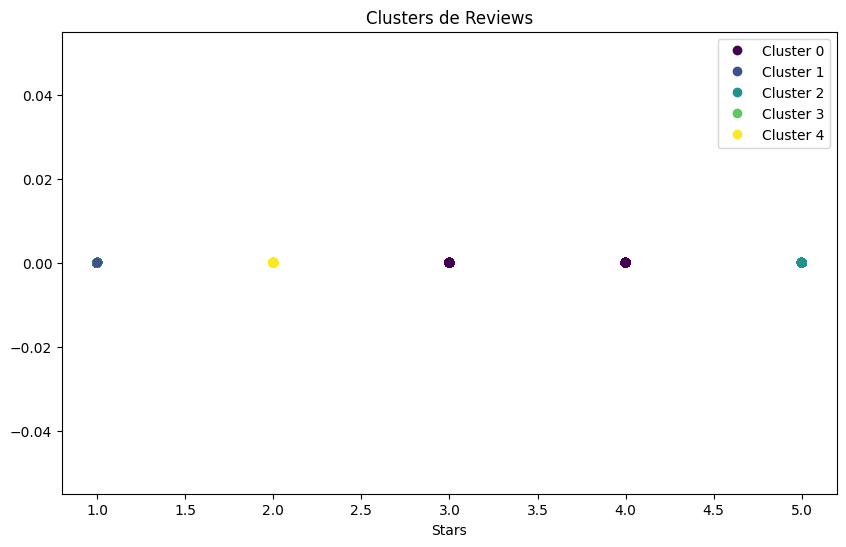

In [128]:
# Convertir los nuevos datos a un DataFrame (ejemplo de nuevos datos, ajusta según tu caso)
new_data = {'stars': [2.2], 'text': ['Disappointing experience']}
df_new_data = pd.DataFrame(new_data)

# Preprocesar los nuevos datos usando el mismo preprocesador
X_new_scaled = preprocessor.transform(df_new_data)

# Predecir clusters para los nuevos datos
predicted_clusters_new = kmeans.predict(X_new_scaled)

# Añadir los clusters predichos para los nuevos datos al DataFrame
df_new_data['predicted_cluster'] = predicted_clusters_new

# Mostrar los resultados de los nuevos datos
print("Predicciones de cluster para nuevos datos:")
print(df_new_data)

# Graficar los clusters utilizando solo 'stars'
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_reviews['stars'], [0] * len(df_reviews), c=df_reviews['predicted_cluster'], cmap='viridis')
plt.xlabel('Stars')
plt.title('Clusters de Reviews')
plt.legend(handles=scatter.legend_elements()[0], labels=[f'Cluster {i}' for i in range(kmeans.n_clusters)])
plt.show()

# Preprocesador

In [133]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from joblib import dump, load

# Ruta de los modelos
CLUSTER_PATH = '../models/cluster_analysis.pkl'
PREPROCESSOR_PATH = '../models/preprocessor.pkl'

# Datos de entrenamiento (ejemplo)
data = {
    'text': [
        "Ordered Caramel frappe at Drive thru, BIG MISTAKE! Took 30 min and there were only 2 cars in front of me.",
            "Drum-roll please! Review #100 coming right up! \n\nI chose to review Starbucks as my 100th review because it is a guilty pleasure. Something that I only allow myself once a week. But something that I crave everyday! \n\nThis particular Starbucks is great. The baristas are always friendly and welcoming. The drinks are made correctly and quickly. I usually go with a Salted Caramel Hot Chocolate or Mocha. I also occasionally order the White Mocha. If you can't tell, I enjoy coffee that doesn't taste like coffee! In the summer their iced teas are the perfect thirst quencher! Their breakfast pastry items are always delicious. Try the Cranberry-Orange Scone and you will not be disappointed! Their breakfast sandwiches are unique and pretty tasty as well.\n\nI always choose to go in and place my order over sitting in the drive thru. The line for their drive thru is always ridiculously long. It's usually quicker to go in.",
            "We stopped here for my Chai and Hubby's coffee and caffeine mania. The line went quite fast, they're quick with the service especially not a lot of people at the time. My Chai came out good, awesome! One thing I forgot to do is to purchase more coffee for the house. They have lots for sale. But not too worry because we still have plenty of Starbucks coffee at home. What would life be without Starbucks?.",
            "There's been three times that I've ordered a green tea lemonade and got a peach tea lemonade and had to turn all the way back and go inside and have theme remake it",
            "I went in when they had 4 people working, waited for 15 minutes for my tea latte which came out as basically water. Returned it twice but gave up when the barista offered some other iced tea latte they already had instead. It was still the same - water. The baristas should REALLY REALLY learn how to make their stuff... seriously Starbucks??!!! So disappointed!!!!! :'(.",
            " Most of the time I go through the drive thru here.  While sometimes the line is a bit long I have to say these guys move in record time.  The line moves fast and my coffee is waiting for me when I get to the window.  How much more can you ask for? \n\nInside there is a decent amount of seating and there is quite a bit of outdoor seating too.  Overall this is a great Starbuck",
            """i dont know what has happened to the in store service in this place!  We have been down here for a few weeks now and have been here 6 times.Only once was the order completed without a screw up!\n\nToday 2 tall decaf coffees took close to 20 minutes.By then our bagels were cold.First i was told the decaf was "brewing' and then i was told there was something 'wrong" with the brewer? After 15 minutes i was offered a decaf americano.\nBefore we left i politely told a fellow behind the counter the service was abominable and he said 'well we can only store 2 vente size decafs at a time? HUH? I asked if the management knew about this and he just shrugged.\nClearly this staff has never been trained to make it right for the customer.No apology.No coupon.Just a convoluted story.\n \nAmazing how you can have numerous people running around a store but you cant get the simplest order straight My next visit to a Starbucks will certainly not be this one""",
            "Nothing makes my busy day easy like my iced coffee at Starbucks and this location botched it up for me: see my photo yup those are coffee grinds at the bottom a whole bunch of coffee grinds:( yuck yuck!"
    ]
}

df_train = pd.DataFrame(data)

# Crear y ajustar el TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(df_train['text'])

# Crear y ajustar el modelo KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_train)

# Guardar el modelo y el vectorizador
dump(kmeans, CLUSTER_PATH)
dump(vectorizer, PREPROCESSOR_PATH)


['../models/preprocessor.pkl']

# Vectorizador

In [2]:
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Cargar los datos de entrenamiento
df_reviews = pd.read_parquet('../gcp/reviews_starbucks.parquet')

# Entrenar el vectorizador TF-IDF con los textos de las reseñas
tfidf = TfidfVectorizer(stop_words='english', max_features=100)
tfidf.fit(df_reviews['text'])

# Guardar el vectorizador TF-IDF
joblib.dump(tfidf, '../models/tfidf_vectorizer.pkl')

['../models/tfidf_vectorizer.pkl']